In [1]:
import keras as k
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
model = Sequential()#[Dense(4,activation='sigmoid',use_bias=True, input_dim=2)])

In [3]:
model.add(Dense(4,activation='sigmoid',use_bias=True, input_dim=2))

In [4]:
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
import pandas as pd
import numpy as np
data=pd.read_csv("pseudo_data_square.csv",sep="\t", header=None)
data.columns=['x','y','results']
DATA_1=np.array(data.x)
DATA_2=np.array(data.y)
RESULTS=np.array(data.results)
END=int(len(DATA_1)*0.6)
DATA_train=np.vstack((DATA_1[:END], DATA_2[:END])).T
DATA_train_x=DATA_1[:END]
DATA_train_y=DATA_2[:END]
RESULTS_train=RESULTS[:END]
DATA_check=np.vstack((DATA_1[END:], DATA_2[END:])).T
RESULTS_check=RESULTS[END:]
RESULTS_NN=np.zeros(len(RESULTS[END:]))

In [21]:
model.fit(DATA_train,RESULTS_train, epochs=100, batch_size=10)

Epoch 1/100
300/300 [==============================] - 0s 253us/step - loss: 0.0332 - accuracy: 1.0000
Epoch 2/100
300/300 [==============================] - 0s 290us/step - loss: 0.0331 - accuracy: 1.0000
Epoch 3/100
300/300 [==============================] - 0s 293us/step - loss: 0.0331 - accuracy: 1.0000
Epoch 4/100
300/300 [==============================] - 0s 301us/step - loss: 0.0331 - accuracy: 1.0000
Epoch 5/100
300/300 [==============================] - 0s 264us/step - loss: 0.0331 - accuracy: 1.0000
Epoch 6/100
300/300 [==============================] - 0s 299us/step - loss: 0.0331 - accuracy: 1.0000
Epoch 7/100
300/300 [==============================] - 0s 262us/step - loss: 0.0331 - accuracy: 1.0000
Epoch 8/100
300/300 [==============================] - 0s 296us/step - loss: 0.0330 - accuracy: 1.0000
Epoch 9/100
300/300 [==============================] - 0s 254us/step - loss: 0.0330 - accuracy: 1.0000
Epoch 10/100
300/300 [==============================] - 0s 216us/step - l

300/300 [==============================] - 0s 297us/step - loss: 0.0316 - accuracy: 1.0000
Epoch 80/100
300/300 [==============================] - 0s 336us/step - loss: 0.0316 - accuracy: 1.0000
Epoch 81/100
300/300 [==============================] - 0s 346us/step - loss: 0.0317 - accuracy: 1.0000
Epoch 82/100
300/300 [==============================] - 0s 346us/step - loss: 0.0316 - accuracy: 1.0000
Epoch 83/100
300/300 [==============================] - 0s 246us/step - loss: 0.0316 - accuracy: 1.0000
Epoch 84/100
300/300 [==============================] - 0s 376us/step - loss: 0.0316 - accuracy: 1.0000
Epoch 85/100
300/300 [==============================] - 0s 302us/step - loss: 0.0315 - accuracy: 1.0000
Epoch 86/100
300/300 [==============================] - 0s 237us/step - loss: 0.0315 - accuracy: 1.0000
Epoch 87/100
300/300 [==============================] - 0s 231us/step - loss: 0.0315 - accuracy: 1.0000
Epoch 88/100
300/300 [==============================] - 0s 257us/step - loss:

In [23]:
RESULTS_NN=model.predict(DATA_check, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)


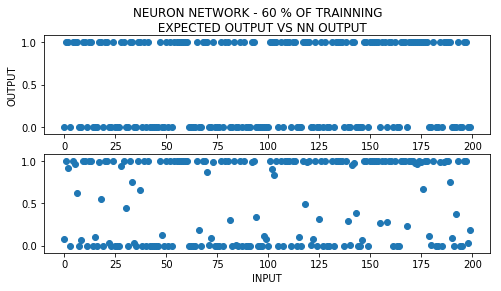

In [24]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,figsize=(8,4))
plt.suptitle('NEURON NETWORK - 60 % OF TRAINNING \n EXPECTED OUTPUT VS NN OUTPUT')

x1=np.arange(len(RESULTS_NN))

axs[1].scatter(x1,RESULTS_NN, marker='o',label="CORRECT OUTUPTS")
axs[0].scatter(x1,RESULTS_check,label="NN OUTUPTS")
axs[1].set_xlabel('INPUT')
axs[0].set_ylabel('OUTPUT')
#plt.tight_layout()
plt.show()

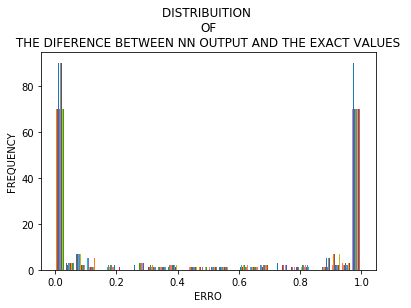

In [25]:
ERRO=np.fabs(RESULTS_check-RESULTS_NN)
plt.hist(ERRO,bins=30)
plt.title("DISTRIBUITION \nOF\n THE DIFERENCE BETWEEN NN OUTPUT AND THE EXACT VALUES ")
plt.ylabel('FREQUENCY')
plt.xlabel('ERRO')
plt.style.use('seaborn-dark-palette')
plt.show()